**Objective:**
As a Data Scientist, you have been hired by HealthPlus to analyze the data, find out what factors affect the LOS the most, and come up with a machine learning model which can predict the LOS of a patient using the data available during admission and after running a few tests. Also, bring about useful insights and policies from the data, which can help the hospital to improve their health care infrastructure and revenue.

**Data Dictionary:**
The data contains various information recorded during the time of admission of the patient. It only contains records of patients who were admitted to the hospital. The detailed data dictionary is given below:


*   patientid: Patient ID
*   Age: Range of age of the patient
*   gender: Gender of the patient
*Type of Admission: Trauma, emergency or urgent
*Severity of Illness: Extreme, moderate, or minor
*health_conditions: Any previous health conditions suffered by the patient
*Visitors with Patient: The number of patients who accompany the patient
*Insurance: Does the patient have health insurance or not?
*Admission_Deposit: The deposit paid by the patient during admission
*Stay (in days): The number of days that the patient has stayed in the hospital. This is the target variable
*Available Extra Rooms in Hospital: The number of rooms available during admission
*Department: The department which will be treating the patient
*Ward_Facility_Code: The code of the ward facility in which the patient will be admitted
*doctor_name: The doctor who will be treating the patient
*staff_available: The number of staff who are not occupied at the moment in the ward










In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor

# To encode categorical variables
from sklearn.preprocessing import LabelEncoder

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To check model performance
from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
path="/content/drive/MyDrive/Hospital LOS Prediction - ML/healthcare_data.csv"
df=pd.read_csv(path)

###Data Overview

In [9]:
df.head(10)

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34
5,2,gynecology,F,Dr Olivia,2,130189,21-30,Female,Trauma,Moderate,Other,2,Yes,4539.268397,11
6,7,gynecology,D,Dr Olivia,5,11175,31-40,Female,Emergency,Moderate,Other,3,Yes,4669.961786,8
7,3,gynecology,B,Dr Sophia,8,82988,21-30,Female,Emergency,Moderate,Heart disease,3,Yes,5101.675480,7
8,2,TB & Chest disease,A,Dr John,7,80339,31-40,Other,Trauma,Moderate,Other,2,No,4899.767616,12
9,4,gynecology,D,Dr Sarah,7,89055,41-50,Female,Trauma,Extreme,Asthama,4,No,3350.366777,8


In [7]:
df.shape

(500000, 15)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Available Extra Rooms in Hospital,500000.0,3.638800,2.698124,0.000000,2.000000,3.000000,4.000000,24.00000
staff_available,500000.0,5.020470,3.158103,0.000000,2.000000,5.000000,8.000000,10.00000
patientid,500000.0,63150.519058,41689.479956,-3269.000000,25442.000000,57864.000000,103392.000000,134400.00000
Visitors with Patient,500000.0,3.549414,2.241054,0.000000,2.000000,3.000000,4.000000,32.00000
Admission_Deposit,500000.0,4722.315734,1047.324220,1654.005148,4071.714532,4627.003792,5091.612717,10104.72639
Stay (in days),500000.0,12.381062,7.913174,3.000000,8.000000,9.000000,11.000000,51.00000


In [7]:
df.describe(include = 'O')

,Department,Ward_Facility_Code,doctor_name,Age,gender,Type of Admission,Severity of Illness,health_conditions,Insurance
count,500000,500000,500000,500000,500000,500000,500000,500000,500000
unique,5,6,9,10,3,3,3,6,2
top,gynecology,F,Dr Sarah,21-30,Female,Trauma,Moderate,None,Yes
freq,343478,120538,99596,159793,370810,310536,280197,151888,392960


In [8]:
df.isnull().sum()

Available Extra Rooms in Hospital    0
Department                           0
Ward_Facility_Code                   0
doctor_name                          0
staff_available                      0
patientid                            0
Age                                  0
gender                               0
Type of Admission                    0
Severity of Illness                  0
health_conditions                    0
Visitors with Patient                0
Insurance                            0
Admission_Deposit                    0
Stay (in days)                       0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  500000 non-null  int64  
 1   Department                         500000 non-null  object 
 2   Ward_Facility_Code                 500000 non-null  object 
 3   doctor_name                        500000 non-null  object 
 4   staff_available                    500000 non-null  int64  
 5   patientid                          500000 non-null  int64  
 6   Age                                500000 non-null  object 
 7   gender                             500000 non-null  object 
 8   Type of Admission                  500000 non-null  object 
 9   Severity of Illness                500000 non-null  object 
 10  health_conditions                  500000 non-null  object 
 11  Visitors with Patient              5000

In [5]:
df['patientid'].value_counts()

126719    21
125695    21
44572     21
126623    21
125625    19
          ..
37634      1
91436      1
118936     1
52366      1
105506     1
Name: patientid, Length: 126399, dtype: int64

In [10]:
df = df.drop(columns = ['patientid'])
df.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34


In [13]:
df["Department"].value_counts(1)

gynecology            0.686956
radiotherapy          0.168630
anesthesia            0.088358
TB & Chest disease    0.045780
surgery               0.010276
Name: Department, dtype: float64

In [11]:
cat_col = ["Department","Type of Admission","Severity of Illness","gender","Insurance","health_conditions","doctor_name","Ward_Facility_Code","Age"]

for i in cat_col:
  print(df[i].value_counts(1))
  print("--"*25)

gynecology            0.686956
radiotherapy          0.168630
anesthesia            0.088358
TB & Chest disease    0.045780
surgery               0.010276
Name: Department, dtype: float64
--------------------------------------------------
Trauma       0.621072
Emergency    0.271568
Urgent       0.107360
Name: Type of Admission, dtype: float64
--------------------------------------------------
Moderate    0.560394
Minor       0.263074
Extreme     0.176532
Name: Severity of Illness, dtype: float64
--------------------------------------------------
Female    0.74162
Male      0.20696
Other     0.05142
Name: gender, dtype: float64
--------------------------------------------------
Yes    0.78592
No     0.21408
Name: Insurance, dtype: float64
--------------------------------------------------
None                   0.303776
Other                  0.188822
High Blood Pressure    0.158804
Diabetes               0.147288
Asthama                0.131028
Heart disease          0.070282
Name: hea

#Exploratory Data Analysis (EDA)

###Univariate Analysis

In [8]:
def histogram_boxplot_func(df, feature, kde = True, bins = 23):
  fig, ax = plt.subplots(2,1, sharex = True, gridspec_kw={'height_ratios':(1,3)}, figsize = (12,7))
  sns.boxplot(data=df, x = feature, showmeans = True, color = 'pink', ax = ax[0])
  sns.histplot(data=df,x=feature, bins = 23, kde = False, ax = ax[1])
  ax[1].axvline(df[feature].mean(), linestyle = '--', color = 'green')
  ax[1].axvline(df[feature].median(), linestyle = '--', color = 'black')

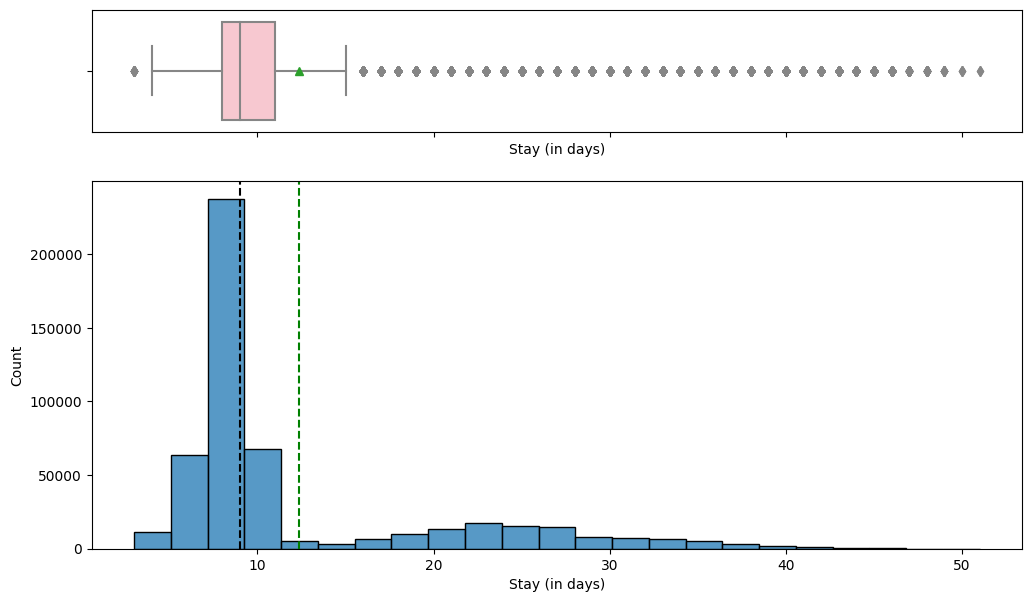

In [9]:
histogram_boxplot_func(df,'Stay (in days)', kde = True, bins = 30)

Observations: Most of the patients are staying in 8-9 days(Peak) and fewer patients are staying more than 10 days and very few more than 40 days

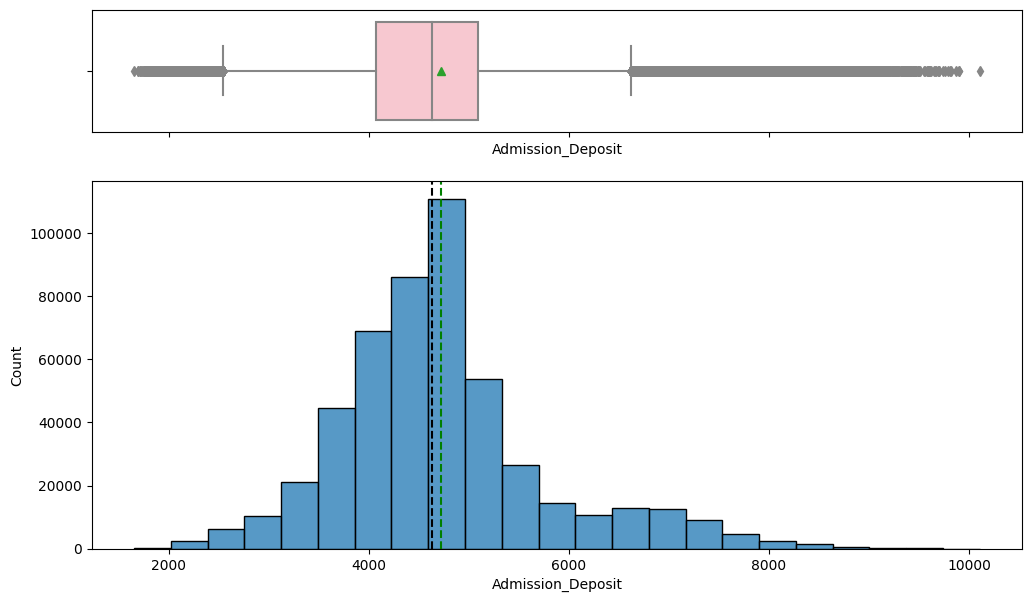

In [10]:
histogram_boxplot_func(df,"Admission_Deposit", kde = True, bins = 30)

Observations: Relatively even distribution compared to the previous feature with outliers on both sides

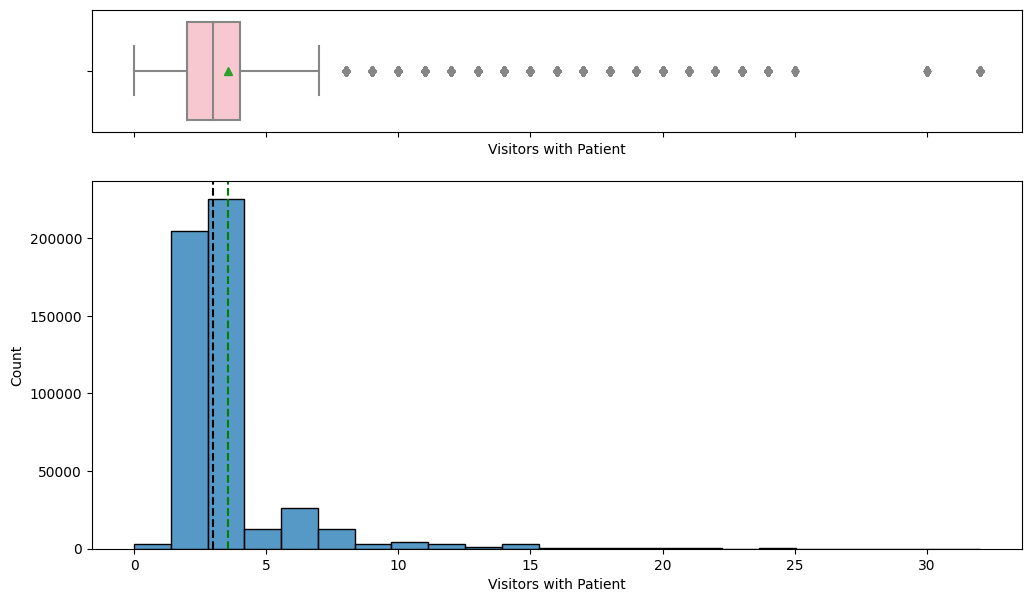

In [11]:
histogram_boxplot_func(df, "Visitors with Patient", kde = True, bins = 30)

*   Highly skewed towards the right
*   2 and 4 are the most common visitors with patients

###Bivariate Analysis

<Axes: >

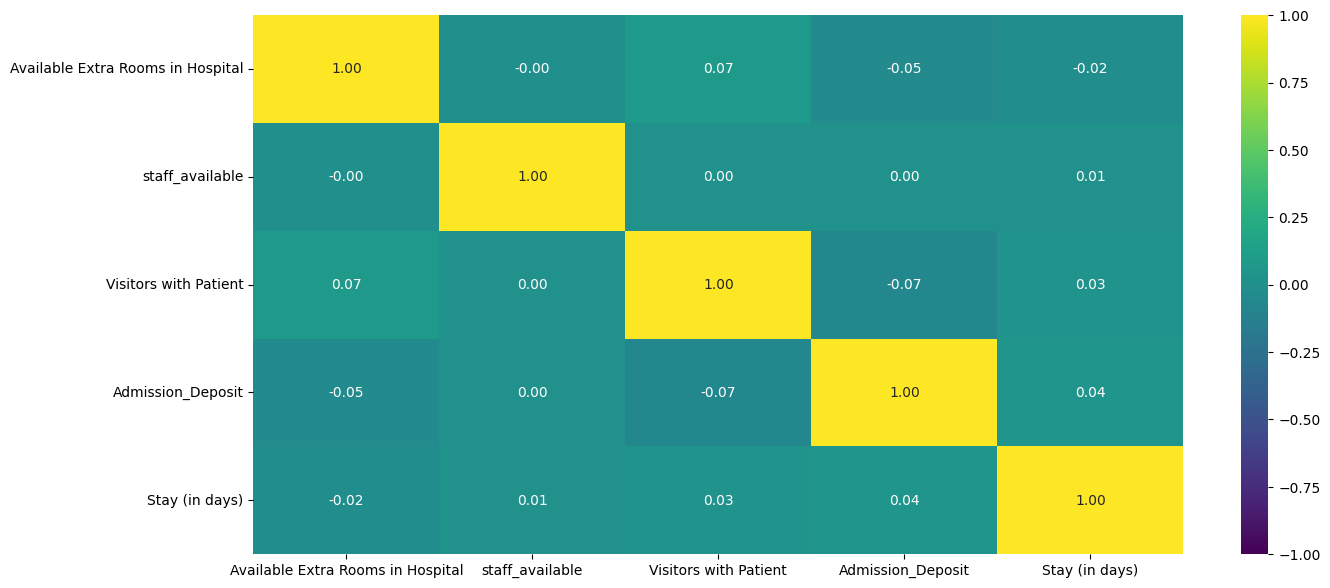

In [12]:
#Finding correlation between various variables in the dataset
plt.figure(figsize = (15,7))
sns.heatmap(df.corr(),annot = True,vmin = -1, vmax = 1,fmt = ".2f", cmap = 'viridis')

Observation: There is no correlation between the variables

In [13]:

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins = True).sort_values(by = sorter, ascending = False)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize = "index").sort_values(by = sorter, ascending = False)
    tab.plot(kind = "bar", stacked = True, figsize = (count + 1, 5))
    plt.legend(loc = "lower left",frameon = False,)
    plt.legend(loc = "upper left", bbox_to_anchor = (1, 1))
    plt.show()

In [14]:
df.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34


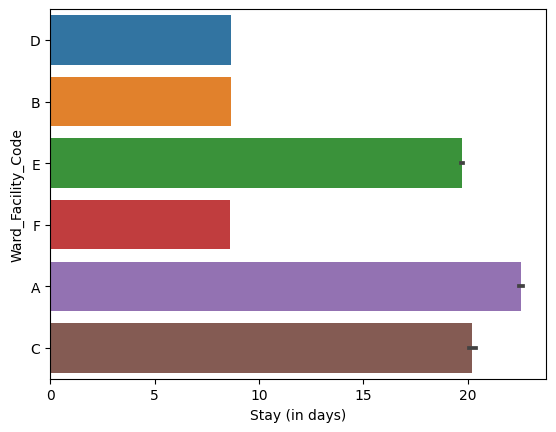

In [15]:
sns.barplot(y ='Ward_Facility_Code', x='Stay (in days)', data = df)
plt.show()

Department          TB & Chest disease  anesthesia  gynecology  radiotherapy  \
Ward_Facility_Code                                                             
A                                 4709       15611           0         21093   
All                              22890       44179      343478         84315   
B                                    0           0      103885             0   
C                                 1319        4199           0          9079   
D                                    0           0      119055             0   
E                                16862       24369           0         54143   
F                                    0           0      120538             0   

Department          surgery     All  
Ward_Facility_Code                   
A                      5138   46551  
All                    5138  500000  
B                         0  103885  
C                         0   14597  
D                         0  119055  
E            

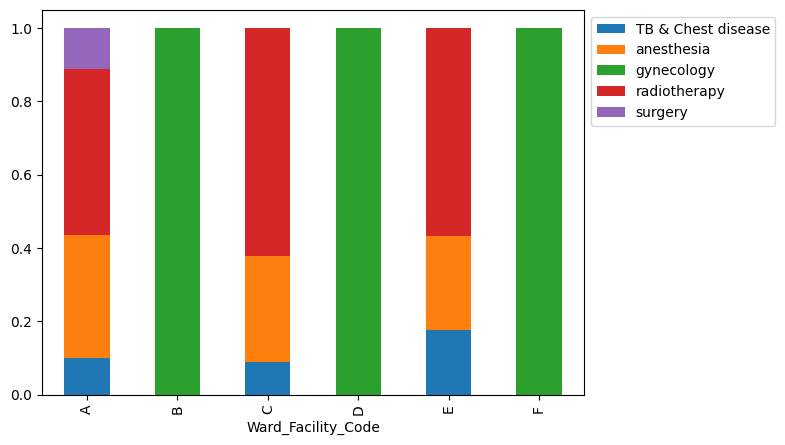

In [16]:
stacked_barplot(df,'Ward_Facility_Code','Department')

Severity of Illness  Extreme   Minor  Moderate     All
Ward_Facility_Code                                    
All                    88266  131537    280197  500000
D                      29549   27220     62286  119055
B                      24222   23579     56084  103885
A                      13662    7877     25012   46551
E                      11488   22254     61632   95374
F                       5842   47594     67102  120538
C                       3503    3013      8081   14597
------------------------------------------------------------------------------------------------------------------------


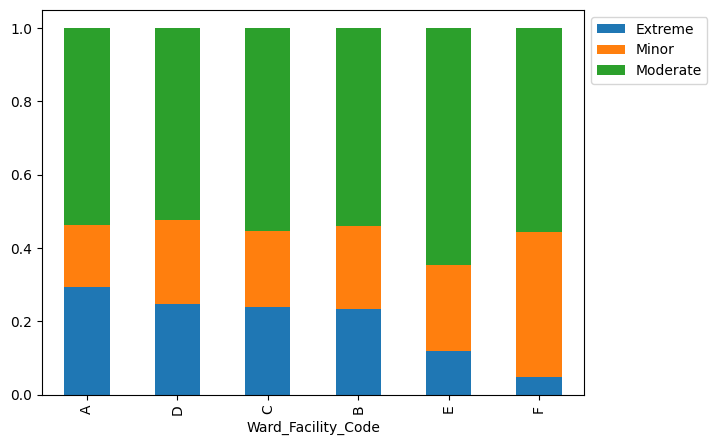

In [23]:
stacked_barplot(df,'Ward_Facility_Code','Severity of Illness' )

In [24]:
df.head(2)

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9


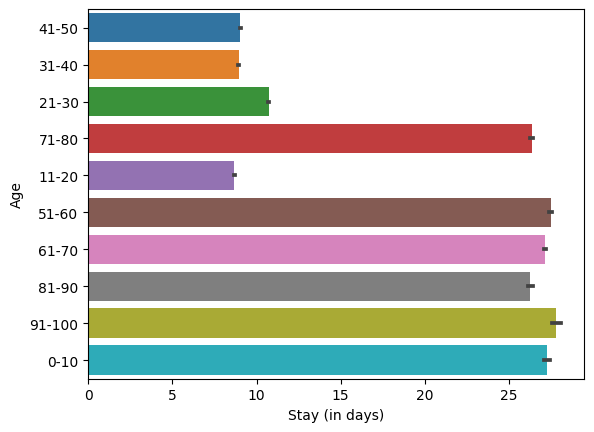

In [26]:
sns.barplot(data =df, y ='Age', x = 'Stay (in days)' )
plt.show()

###Data Preparation for Model Building

In [15]:
df = pd.get_dummies(
    df,
    columns = df.select_dtypes(include = ["object", "category"]).columns.tolist(),
    drop_first = True,
)


In [16]:
df.head()

,Available Extra Rooms in Hospital,staff_available,Visitors with Patient,Admission_Deposit,Stay (in days),Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F,doctor_name_Dr John,doctor_name_Dr Mark,doctor_name_Dr Nathan,doctor_name_Dr Olivia,doctor_name_Dr Sam,doctor_name_Dr Sarah,doctor_name_Dr Simon,doctor_name_Dr Sophia,Age_11-20,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80,Age_81-90,Age_91-100,gender_Male,gender_Other,Type of Admission_Trauma,Type of Admission_Urgent,Severity of Illness_Minor,Severity of Illness_Moderate,health_conditions_Diabetes,health_conditions_Heart disease,health_conditions_High Blood Pressure,health_conditions_None,health_conditions_Other,Insurance_Yes
0,4,0,4,2966.408696,8,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
1,4,2,2,3554.835677,9,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0
2,2,8,2,5624.733654,7,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
3,4,7,4,4814.149231,8,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
4,2,10,2,5169.269637,34,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0


In [17]:
x = df.drop('Stay (in days)', axis = 1)
y = df['Stay (in days)']

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2,shuffle = True, random_state = 1)

In [19]:
print("Shape of training set:",x_train.shape)
print("Shape of testing set:",x_test.shape)

Shape of training set: (400000, 42)
Shape of testing set: (100000, 42)


###Model Building

In [20]:
# Function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# Function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    pred = model.predict(predictors)                  # Predict using the independent variables
    r2 = r2_score(target, pred)                       # To compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)    # To compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # To compute RMSE
    mae = mean_absolute_error(target, pred)           # To compute MAE
    mape = mape_score(target, pred)                   # To compute MAPE

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [21]:
import statsmodels.api as sm

# Statsmodel API does not add a constant by default. We need to add it explicitly.
x_train1 = sm.add_constant(x_train)

# Add constant to test data
x_test1 = sm.add_constant(x_test)

# Train the model
olsmodel1 = sm.OLS(y_train, x_train1).fit()

# Get the model summary
olsmodel1.summary()
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:         Stay (in days)   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                 5.643e+04
Date:                Mon, 04 Sep 2023   Prob (F-statistic):               0.00
Time:                        20:40:17   Log-Likelihood:            -1.0246e+06
No. Observations:              400000   AIC:                         2.049e+06
Df Residuals:                  399961   BIC:                         2.050e+06
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [22]:
lin_reg_test = model_performance_regression(olsmodel1, x_test1, y_test)
lin_reg_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.144036,2.155759,0.84303,0.842962,19.676874


Observation:

We can observe that R-squared for the model is ~0.84.

In [23]:
print("Performance on train data: ")
model_performance_regression(olsmodel1, x_train1, y_train)

Performance on train data: 


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.135092,2.14624,0.842813,0.842796,19.591781


In [24]:
print("Performance on test data: ")
model_performance_regression(olsmodel1, x_test1, y_test)

Performance on test data: 


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.144036,2.155759,0.84303,0.842962,19.676874


Observation:

- **The Root Mean Squared Error** of train and test data are **very close**, indicating that **our model is not overfitting** to the training data.

- Mean Absolute Error (MAE) indicates that the current model can predict LOS of patients within **mean error of 2.15 days** on the test data.

- The units of both RMSE and MAE are the same - days in this case. But RMSE is greater than MAE because it penalizes the outliers more.

- **Mean Absolute Percentage Error is ~19%** on the test data, indicating that the average difference between the predicted value and the actual value is ~19%.

###Checking for Multicollinearity

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


In [25]:
print(checking_vif(x_train1))

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                                  feature        VIF
0                                   const   0.000000
1       Available Extra Rooms in Hospital   1.023190
2                         staff_available   1.001928
3                   Visitors with Patient   1.029237
4                       Admission_Deposit   1.021088
5                   Department_anesthesia   2.737559
6                   Department_gynecology        inf
7                 Department_radiotherapy   7.650821
8                      Department_surgery        inf
9                    Ward_Facility_Code_B        inf
10                   Ward_Facility_Code_C   1.366866
11                   Ward_Facility_Code_D        inf
12                   Ward_Facility_Code_E   2.880783
13                   Ward_Facility_Code_F        inf
14                    doctor_name_Dr John        inf
15                    doctor_name_Dr Mark        inf
16                  doctor_name_Dr Nathan        inf
17                  doctor_name_Dr Olivia     

Observation: All the continuous variables have VIF less than 5, which makes sense according to what we observed in correlation heatmap.

In [26]:
x_train2 = x_train1.drop(['Insurance_Yes','staff_available','Visitors with Patient'], axis = 1)
x_test2 = x_test1.drop(['Insurance_Yes','staff_available','Visitors with Patient'], axis = 1)

#train the model again

olsmodel2 = sm.OLS(y_train, x_train2).fit()

olsmodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Stay (in days)   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                 6.127e+04
Date:                Mon, 04 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:26:10   Log-Likelihood:            -1.0246e+06
No. Observations:              400000   AIC:                         2.049e+06
Df Residuals:                  399964   BIC:                         2.050e+06
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    19.8830      0.054    367.192      0.000      19.777      19.989
Available Extra Rooms in Hospital         0.0786      0.002     42.392      0.000       0.075       0.082
Admission_Deposit                     -3.843e-05   4.77e-06     -8.052      0.000   -4.78e-05   -2.91e-05
Department_anesthesia                     6.0823      0.029    210.151      0.000       6.026       6.139
Department_gynecology                     0.4614      0.019     24.233      0.000       0.424       0.499
Department_radiotherapy                  -4.6218      0.037   -126.176      0.000      -4.694      -4.550
Department_surgery                        9.6845      0.044    218.840      0.000       9.598       9.771
Ward_Facility_Code_B                      0.2563      0.011     23.447      0.000       0.235       0.278
Ward_Facility_Code_C                      0.4350      0.034     12.612      0.000       0.367       0.503
Ward_Facility_Code_D                      0.2027      0.010     19.348      0.000       0.182       0.223
Ward_Facility_Code_E                      0.3088      0.021     14.447      0.000       0.267       0.351
Ward_Facility_Code_F                      0.0024      0.011      0.223      0.823      -0.019       0.024
doctor_name_Dr John                       7.2605      0.031    234.529      0.000       7.200       7.321
doctor_name_Dr Mark                       1.1939      0.033     36.405      0.000       1.130       1.258
doctor_name_Dr Nathan                    -0.2169      0.017    -12.700      0.000      -0.250      -0.183
doctor_name_Dr Olivia                    -0.3626      0.016    -23.037      0.000      -0.393      -0.332
doctor_name_Dr Sam                        1.2826      0.038     33.877      0.000       1.208       1.357
doctor_name_Dr Sarah                      0.8247      0.020     41.732      0.000       0.786       0.863
doctor_name_Dr Simon                      6.1584      0.069     89.079      0.000       6.023       6.294
doctor_name_Dr Sophia                     0.2162      0.020     10.583      0.000       0.176       0.256
Age_11-20                               -12.7379      0.065   -194.592      0.000     -12.866     -12.610
Age_21-30                               -10.4831      0.062   -168.470      0.000     -10.605     -10.361
Age_31-40                               -13.4355      0.062   -216.958      0.000     -13.557     -13.314
Age_41-50                               -13.5114      0.062   -216.834      0.000     -13.633     -13.389
Age_51-60                                -0.3665      0.065     -5.651      0.000      -0.494      -0.239
Age_61-70                                -0.4217      0.064     -6.592      0.000      -0.547      -0.296
Age_71-80

In [27]:
print("Checking Performance on train data")
model_performance_regression(olsmodel2,x_train2,y_train)


Checking Performance on train data


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.135096,2.146234,0.842812,0.842796,19.591646


In [28]:

print("Checking Performance on test data")
model_performance_regression(olsmodel2,x_test2,y_test)

Checking Performance on test data


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.144035,2.155757,0.84303,0.842967,19.676878


Observation:

RMSE, MAE, and MAPE of train and test data are very close, indicating that the model is not overfitting and has generalized well over the unseen data.

In [29]:
coef = olsmodel2.params
coef

const                                    19.882991
Available Extra Rooms in Hospital         0.078613
Admission_Deposit                        -0.000038
Department_anesthesia                     6.082290
Department_gynecology                     0.461435
Department_radiotherapy                  -4.621785
Department_surgery                        9.684522
Ward_Facility_Code_B                      0.256348
Ward_Facility_Code_C                      0.435039
Ward_Facility_Code_D                      0.202650
Ward_Facility_Code_E                      0.308803
Ward_Facility_Code_F                      0.002437
doctor_name_Dr John                       7.260505
doctor_name_Dr Mark                       1.193884
doctor_name_Dr Nathan                    -0.216913
doctor_name_Dr Olivia                    -0.362561
doctor_name_Dr Sam                        1.282646
doctor_name_Dr Sarah                      0.824732
doctor_name_Dr Simon                      6.158436
doctor_name_Dr Sophia          

###Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train,y_train)

LinearRegression()

In [33]:
#Check performance on training data
linear_reg = model_performance_regression(model,x_train,y_train)
linear_reg

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.135092,2.14624,0.842813,0.842796,19.591781


In [34]:
#Check performance on testing data
linear_reg_test = model_performance_regression(model,x_test,y_test)
linear_reg_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.144036,2.155759,0.84303,0.842964,19.676874


Observation:

- The Root Mean Squared Error and the adjusted $R^2$ of train and test data are very close, indicating that our model is not overfitting to the training data.
- MAE is also very close
- This model has high predictive power

### Regularization - Ridge Regression

In [36]:
ridge_model = Ridge()
ridge_model.fit(x_train,y_train)

Ridge()

In [37]:
ridge_model = model_performance_regression(ridge_model,x_test,y_test)
ridge_model

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.144039,2.155819,0.84303,0.842964,19.677875


In [39]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 1)
params = {'alpha': [0.001,0.01,0.1,0.2,0.5,0.9,1,5,10,20]}
model = Ridge()
model_cv = GridSearchCV(estimator = model , param_grid=params,scoring = 'r2', cv = folds, return_train_score= True)
model_cv.fit(x_train,y_train)


GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5, 10,
                                   20]},
             return_train_score=True, scoring='r2')

In [40]:
model_cv.best_params_ #getting optimised parameters for alpha

{'alpha': 0.1}

In [41]:
ridge_model_tuned = Ridge(alpha=0.1) ##creating Tuned Ridge Regression model using optimised alpha value
ridge_model_tuned.fit(x_train, y_train) # Fitting the data into the tuned model

Ridge(alpha=0.1)

In [42]:
ridge_reg_tuned = model_performance_regression(ridge_model_tuned, x_test, y_test) #getting performance metrics on test data
ridge_reg_tuned

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.144037,2.155765,0.84303,0.842964,19.676974


### Regularization - Lasso Regression

In [45]:
lasso_model = Lasso()
lasso_model.fit(x_train,y_train)

Lasso()

In [48]:
lasso_reg = model_performance_regression(lasso_model, x_test,y_test)
lasso_reg

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,6.064339,3.873332,0.416006,0.41576,34.652716


Observation: R square is very poor with default alpha value =1


In [51]:
#Test the model with optimized aplha
folds = KFold(n_splits=10, shuffle=True, random_state=1)
params = {'alpha':[0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5,10,20]}
model = Lasso()
model_cv = GridSearchCV(estimator=model, param_grid=params, scoring='r2', cv=folds, return_train_score=True)
model_cv.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5, 10,
                                   20]},
             return_train_score=True, scoring='r2')

In [52]:
model_cv.best_params_

{'alpha': 0.001}

In [53]:
lasso_model_tuned = Lasso(alpha=0.001)
lasso_model_tuned.fit(x_train, y_train)

Lasso(alpha=0.001)

In [54]:
lasso_reg_tuned = model_performance_regression(lasso_model_tuned, x_test, y_test)
lasso_reg_tuned

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.144315,2.157198,0.843002,0.842936,19.70296


###Regulariztion - Elastic Net Regression

In [56]:
from sklearn import linear_model
ElasticNet = linear_model.ElasticNet()
from sklearn.linear_model import ElasticNet

In [57]:
elasticnet = ElasticNet()
elasticnet.fit(x_train, y_train)

ElasticNet()

In [58]:
elasticnet_reg = model_performance_regression(elasticnet, x_test,y_test)
elasticnet_reg

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,6.556087,4.678504,0.317455,0.317168,40.121657


In [1]:
#turn off warnings
import warnings
warnings.filterwarnings('ignore')

In [25]:
folds = KFold(n_splits=10, shuffle=True, random_state=1)
params = {'alpha':[0.001, 0.01, 0.1, 0.2, 0.5, 0.9],
         'l1_ratio': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05]}
model = ElasticNet()
model_cv = GridSearchCV(estimator=model, param_grid=params, scoring='r2', cv=folds, return_train_score=True)
model_cv.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=ElasticNet(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9],
                         'l1_ratio': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05]},
             return_train_score=True, scoring='r2')

In [26]:
model_cv.best_params_

{'alpha': 0.001, 'l1_ratio': 0.05}

In [27]:
elasticnet_model_tuned = ElasticNet(alpha=0.001, l1_ratio=0.05)
elasticnet_model_tuned.fit(x_train, y_train)

ElasticNet(alpha=0.001, l1_ratio=0.05)

In [28]:
elasticnet_reg_tuned = model_performance_regression(elasticnet_model_tuned, x_test, y_test)
elasticnet_reg_tuned

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.157481,2.178912,0.841685,0.841618,19.981591


In [59]:
models= pd.concat([linear_reg_test,ridge_model,ridge_reg_tuned,lasso_reg,lasso_reg_tuned,elasticnet_reg,
                   elasticnet_reg_tuned], axis=0) #combining all models into a single dataframe
models['Models'] = ['Least Squares', 'Ridge Regression', 'Ridge Regression Tuned', 'Lasso Regression',
                                      'Lasso Regression Tuned', 'Elastic Net Regression',
                    'Elastic Net Regression Tuned'] #adding names of the models as a column to the dataframe
models = models.iloc[:,[5, 0,1,2,3,4]] #ordering names of the models as the first column
models

,Models,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,Least Squares,3.144036,2.155759,0.843030,0.842964,19.676874
0,Ridge Regression,3.144039,2.155819,0.843030,0.842964,19.677875
0,Ridge Regression Tuned,3.144037,2.155765,0.843030,0.842964,19.676974
0,Lasso Regression,6.064339,3.873332,0.416006,0.415760,34.652716
0,Lasso Regression Tuned,3.144315,2.157198,0.843002,0.842936,19.702960
0,Elastic Net Regression,6.556087,4.678504,0.317455,0.317168,40.121657
0,Elastic Net Regression Tuned,3.157481,2.178912,0.841685,0.841618,19.981591


### Forward Feature Selection using SequentialFeatureSelector

In [60]:
!pip install mlxtend

In [61]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [73]:
x_train.shape[1]

42

In [62]:
# Model Initalization
reg = LinearRegression()

# Forward Feature Selection
sfs = SFS(
    reg,
    k_features=x_train.shape[1],
    forward=True,
    floating=False,
    scoring="r2",
    n_jobs=-1,
    verbose=2,
    cv=5,
)

# Perform SFS
sfs = sfs.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:   24.3s finished

[2023-09-05 00:12:16] Features: 1/42 -- score: 0.49188988610314494[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:   15.6s finished

[2023-09-05 00:12:31] Features: 2/42 -- score: 0.6046160397618378[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   15.7s finished

[2023-09-05 00:12:47] Features: 3/42 -- score: 0.6461909142668075[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:   18.4s finished

[2023-09-05 00:13:06] Feat

In [71]:
print(sfs.k_feature_names_)

('Available Extra Rooms in Hospital', 'staff_available', 'Visitors with Patient', 'Admission_Deposit', 'Department_anesthesia', 'Department_gynecology', 'Department_radiotherapy', 'Department_surgery', 'Ward_Facility_Code_B', 'Ward_Facility_Code_C', 'Ward_Facility_Code_D', 'Ward_Facility_Code_E', 'Ward_Facility_Code_F', 'doctor_name_Dr John', 'doctor_name_Dr Mark', 'doctor_name_Dr Nathan', 'doctor_name_Dr Olivia', 'doctor_name_Dr Sam', 'doctor_name_Dr Sarah', 'doctor_name_Dr Simon', 'doctor_name_Dr Sophia', 'Age_11-20', 'Age_21-30', 'Age_31-40', 'Age_41-50', 'Age_51-60', 'Age_61-70', 'Age_71-80', 'Age_81-90', 'Age_91-100', 'gender_Male', 'gender_Other', 'Type of Admission_Trauma', 'Type of Admission_Urgent', 'Severity of Illness_Minor', 'Severity of Illness_Moderate', 'health_conditions_Diabetes', 'health_conditions_Heart disease', 'health_conditions_High Blood Pressure', 'health_conditions_None', 'health_conditions_Other', 'Insurance_Yes')


In [66]:
sfs.k_score_

0.8427662384796832

In [68]:
pd.DataFrame(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(5,)","[0.48930483247470125, 0.4893995665799724, 0.49...",0.49189,"(Department_gynecology,)",0.004631,0.003603,0.001802
2,"(5, 6)","[0.6039314194398517, 0.6036027708711531, 0.601...",0.604616,"(Department_gynecology, Department_radiotherapy)",0.003904,0.003037,0.001519
3,"(5, 6, 23)","[0.6451920405295877, 0.6466788041696383, 0.643...",0.646191,"(Department_gynecology, Department_radiotherap...",0.003589,0.002793,0.001396
4,"(5, 6, 23, 24)","[0.7013051378947406, 0.7017453523470838, 0.699...",0.701305,"(Department_gynecology, Department_radiotherap...",0.002248,0.001749,0.000875
5,"(5, 6, 22, 23, 24)","[0.7323231123790204, 0.7331188295734705, 0.730...",0.732307,"(Department_gynecology, Department_radiotherap...",0.002407,0.001873,0.000936
6,"(5, 6, 21, 22, 23, 24)","[0.8175950517648748, 0.8208263748274287, 0.817...",0.819135,"(Department_gynecology, Department_radiotherap...",0.002188,0.001703,0.000851
7,"(4, 5, 6, 21, 22, 23, 24)","[0.8291090319048575, 0.8318896585595269, 0.828...",0.830328,"(Department_anesthesia, Department_gynecology,...",0.002052,0.001596,0.000798
8,"(4, 5, 6, 7, 21, 22, 23, 24)","[0.8384152477665383, 0.8406800037101809, 0.837...",0.839508,"(Department_anesthesia, Department_gynecology,...",0.001884,0.001465,0.000733
9,"(4, 5, 6, 7, 18, 21, 22, 23, 24)","[0.8395841015822758, 0.8417786103209186, 0.838...",0.840625,"(Department_anesthesia, Department_gynecology,...",0.001839,0.001431,0.000715
10,"(4, 5, 6, 7, 18, 21, 22, 23, 24, 37)","[0.8404297266912916, 0.8427204276014219, 0.839...",0.84146,"(Department_anesthesia, Department_gynecology,...",0.00183,0.001423,0.000712


Observation: After 8 features the performance of the model shows accuracy of constant 84%

In [74]:
#Re run the model using 8 features
reg = LinearRegression()

# Forward Feature Selection
sfs = SFS(
    reg,
    k_features=8,
    forward=True,
    floating=False,
    scoring="r2",
    n_jobs=-1,
    verbose=2,
    cv=5,
)

# Perform SFS
sfs = sfs.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:   10.3s finished

[2023-09-05 00:45:29] Features: 1/8 -- score: 0.49188988610314494[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:   14.5s finished

[2023-09-05 00:45:44] Features: 2/8 -- score: 0.6046160397618378[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   21.7s finished

[2023-09-05 00:46:05] Features: 3/8 -- score: 0.6461909142668075[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:   23.5s finished

[2023-09-05 00:46:29] Feature

In [75]:
feature_colums = list(sfs.k_feature_idx_)
print(feature_colums)


[4, 5, 6, 7, 21, 22, 23, 24]


In [76]:
sfs.k_feature_names_

('Department_anesthesia',
 'Department_gynecology',
 'Department_radiotherapy',
 'Department_surgery',
 'Age_11-20',
 'Age_21-30',
 'Age_31-40',
 'Age_41-50')

In [77]:
x_train.columns[feature_colums]

Index(['Department_anesthesia', 'Department_gynecology',
       'Department_radiotherapy', 'Department_surgery', 'Age_11-20',
       'Age_21-30', 'Age_31-40', 'Age_41-50'],
      dtype='object')

In [78]:
x_train_final = x_train[x_train.columns[feat_cols]]

In [79]:
x_test_final = x_test[x_train_final.columns]

In [80]:
linear_reg_model2 = LinearRegression()
linear_reg_model2.fit(x_train_final, y_train)

LinearRegression()

In [81]:
#Check on training data
lin_reg_model2_train = model_performance_regression(linear_reg_model2, x_train_final, y_train)
lin_reg_model2_train

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.135092,2.14624,0.842813,0.842796,19.591781


In [82]:
#Check on testing data
lin_reg_model2_test= model_performance_regression(linear_reg_model2, x_test_final, y_test)
lin_reg_model2_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.144036,2.155759,0.84303,0.842964,19.676874


In [85]:
models_train_comp_df = pd.concat(
    [linear_reg.T, lin_reg_model2_train.T], axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression sklearn (SFS features)",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression sklearn,Linear Regression sklearn (SFS features)
RMSE,3.135092,3.135092
MAE,2.146240,2.146240
R-squared,0.842813,0.842813
Adj. R-squared,0.842796,0.842796
MAPE,19.591781,19.591781


In [86]:
models_test_comp_df = pd.concat(
    [linear_reg_test.T, lin_reg_model2_test.T], axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression sklearn (SFS features)",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Linear Regression sklearn,Linear Regression sklearn (SFS features)
RMSE,3.144036,3.144036
MAE,2.155759,2.155759
R-squared,0.843030,0.843030
Adj. R-squared,0.842964,0.842964
MAPE,19.676874,19.676874


Observation:
- The new model (lin_reg_model2) uses 8 features in comparison to 42 features for the previous model (linear_reg), i.e., the number of features has reduced by ~81%.
- The performance of the new model, however, is very close to our previous model.
- Depending upon time sensitivity and storage restrictions, we can choose between the models.